In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-06-08 08:25:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   223MB/s    in 0.5s    

2022-06-08 08:25:24 (223 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')

In [ ]:
zip_ref.extractall()
zip_ref.close()

### Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

there are 2 directories and 0 images in 'pizza_steak'
there are 2 directories and 0 images in 'pizza_steak/train'
there are 0 directories and 750 images in 'pizza_steak/train/pizza'
there are 0 directories and 750 images in 'pizza_steak/train/steak'
there are 2 directories and 0 images in 'pizza_steak/test'
there are 0 directories and 250 images in 'pizza_steak/test/pizza'
there are 0 directories and 250 images in 'pizza_steak/test/steak'


In [ ]:
num_steak_images_train=len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

### Visualize images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

In [ ]:
def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape : {img.shape}")

  return img

['2052542.jpg']
Image shape : (512, 512, 3)


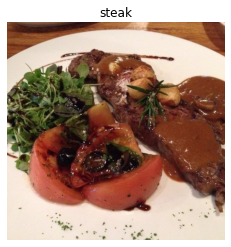

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/',target_class='steak')

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[128,  73,  34],
        [131,  75,  38],
        [131,  75,  40],
        ...,
        [227, 202, 197],
        [213, 188, 184],
        [209, 184, 180]],

       [[124,  69,  30],
        [127,  71,  34],
        [129,  75,  39],
        ...,
        [240, 215, 208],
        [226, 201, 196],
        [220, 195, 190]],

       [[132,  78,  40],
        [134,  80,  42],
        [135,  81,  45],
        ...,
        [254, 230, 220],
        [246, 221, 214],
        [244, 219, 212]],

       ...,

       [[242, 229, 212],
        [241, 228, 211],
        [240, 227, 210],
        ...,
        [237, 222, 201],
        [238, 223, 204],
        [238, 223, 204]],

       [[241, 228, 211],
        [240, 227, 210],
        [239, 226, 209],
        ...,
        [237, 222, 201],
        [236, 221, 202],
        [236, 221, 202]],

       [[240, 227, 210],
        [239, 226, 209],
        [239, 226, 209],
        ...,
        [241, 226, 20

In [ ]:
img.shape    

(512, 512, 3)

In [ ]:
img/255

array([[[0.50196078, 0.28627451, 0.13333333],
        [0.51372549, 0.29411765, 0.14901961],
        [0.51372549, 0.29411765, 0.15686275],
        ...,
        [0.89019608, 0.79215686, 0.77254902],
        [0.83529412, 0.7372549 , 0.72156863],
        [0.81960784, 0.72156863, 0.70588235]],

       [[0.48627451, 0.27058824, 0.11764706],
        [0.49803922, 0.27843137, 0.13333333],
        [0.50588235, 0.29411765, 0.15294118],
        ...,
        [0.94117647, 0.84313725, 0.81568627],
        [0.88627451, 0.78823529, 0.76862745],
        [0.8627451 , 0.76470588, 0.74509804]],

       [[0.51764706, 0.30588235, 0.15686275],
        [0.5254902 , 0.31372549, 0.16470588],
        [0.52941176, 0.31764706, 0.17647059],
        ...,
        [0.99607843, 0.90196078, 0.8627451 ],
        [0.96470588, 0.86666667, 0.83921569],
        [0.95686275, 0.85882353, 0.83137255]],

       ...,

       [[0.94901961, 0.89803922, 0.83137255],
        [0.94509804, 0.89411765, 0.82745098],
        [0.94117647, 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Preprocess data(get all of the pixel values)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


#set paths to data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir, batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224,224), class_mode='binary',seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation = 'relu',
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3, activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding='valid'),
                                    tf.keras.layers.Conv2D(10,3, activation='relu'),
                                    tf.keras.layers.Conv2D(10,3,activation='relu'),

                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')

])



model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])



history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch = len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data)) #steps for each batch instead of all images






Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.5795 - accuracy: 0.6907 - val_loss: 0.4928 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 85s 2s/step - loss: 0.4299 - accuracy: 0.8073 - val_loss: 0.3356 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 83s 2s/step - loss: 0.4057 - accuracy: 0.8227 - val_loss: 0.3422 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 83s 2s/step - loss: 0.3622 - accuracy: 0.8433 - val_loss: 0.2986 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 82s 2s/step - loss: 0.3405 - accuracy: 0.8573 - val_loss: 0.3160 - val_accuracy: 0.8720


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 252ms/step - loss: 2.2926 - accuracy: 0.5833 - val_loss: 0.9267 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6986 - accuracy: 0.7000 - val_loss: 0.5235 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 12s 248ms/step - loss: 0.6783 - accuracy: 0.7147 - val_loss: 0.5637 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.5878 - accuracy: 0.7213 - val_loss: 0.4936 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5278 - accuracy: 0.7600 - val_loss: 0.4822 - val_accuracy: 0.7660


In depth

['3577618.jpg']
Image shape : (512, 512, 3)
['1795316.jpg']
Image shape : (512, 512, 3)


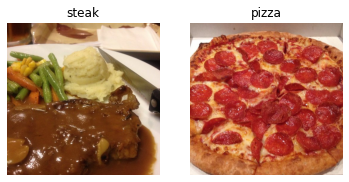

In [ ]:
plt.figure()
plt.subplot(1,2,1)

steak_img = view_random_image('/content/pizza_steak/train/', 'steak')


plt.subplot(1,2,2)

pizza_img = view_random_image('/content/pizza_steak/train/', 'pizza')

In [ ]:
# directories

train_dir = '/content/pizza_steak/train/'
test_dir = '/content/pizza_steak/test'

In [ ]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# when you load images divide all of the pixel values by 255
# generates batches of tensom images data with real time data augmenation


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir, #target dir of images
                                               target_size = (224,224), #target size of images
                                               class_mode = 'binary', #type of data 
                                               batch_size = 32) # size of mini batches





test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode= 'binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
images, labels = train_data.next()

In [ ]:
len(images), len(labels) 

(32, 32)

In [ ]:
# batches
1500/32

46.875

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
images[:2]   #red, green, blue values scaled

array([[[[0.1137255 , 0.11764707, 0.18823531],
         [0.1137255 , 0.11764707, 0.18823531],
         [0.10980393, 0.1137255 , 0.18431373],
         ...,
         [0.95294124, 0.9450981 , 0.9490197 ],
         [0.8235295 , 0.81568635, 0.8196079 ],
         [0.97647065, 0.9686275 , 0.9725491 ]],

        [[0.12156864, 0.1254902 , 0.19607845],
         [0.1254902 , 0.12941177, 0.20000002],
         [0.10196079, 0.10588236, 0.1764706 ],
         ...,
         [0.9333334 , 0.92549026, 0.9294118 ],
         [0.909804  , 0.90196085, 0.9058824 ],
         [0.9960785 , 0.98823535, 0.9921569 ]],

        [[0.09803922, 0.10196079, 0.17254902],
         [0.10588236, 0.10980393, 0.18039216],
         [0.1254902 , 0.13333334, 0.19215688],
         ...,
         [0.8000001 , 0.79215693, 0.7960785 ],
         [0.909804  , 0.90196085, 0.9058824 ],
         [1.        , 0.9960785 , 1.        ]],

        ...,

        [[0.09803922, 0.07843138, 0.09411766],
         [0.07843138, 0.0627451 , 0.06666667]

In [ ]:
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### Creating a CNN model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import Sequential



3 layer convolutional neural network

In [ ]:
model_3 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape = (224,224,3)),
    
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation = 'relu'),

    Flatten(),
    Dense(1, activation='sigmoid')
    
])


model_3.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = ['accuracy'])


history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data), # to step through each epoch take 47 steps to go through all batches
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 95s 2s/step - loss: 1.5826 - accuracy: 0.5700 - val_loss: 0.5943 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 95s 2s/step - loss: 0.4999 - accuracy: 0.7720 - val_loss: 0.4542 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 95s 2s/step - loss: 0.3637 - accuracy: 0.8553 - val_loss: 0.3828 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 94s 2s/step - loss: 0.2301 - accuracy: 0.9140 - val_loss: 0.3832 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 94s 2s/step - loss: 0.1109 - accuracy: 0.9740 - val_loss: 0.5381 - val_accuracy: 0.7660


In [ ]:
import pandas as pd

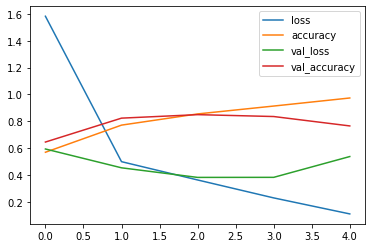

In [ ]:
pd.DataFrame(history_3.history).plot()

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']


  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')

  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')

  plt.legend()



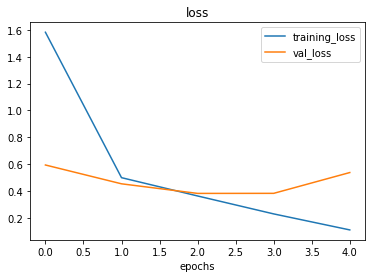

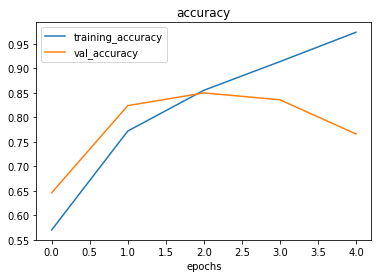

In [ ]:
plot_loss_curves(history_3)

Training loss is decreaing, validation loss is not decreasing -- Overfitting

In [ ]:
tf.random.set_seed(42)
model_4 = Sequential([
                      Conv2D(10,3,activation= 'relu', input_shape=(224,224,3)),
                      MaxPool2D(2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation='sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 898ms/step - loss: 0.6715 - accuracy: 0.5660 - val_loss: 0.5262 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 43s 906ms/step - loss: 0.4716 - accuracy: 0.7907 - val_loss: 0.3677 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 42s 902ms/step - loss: 0.4085 - accuracy: 0.8100 - val_loss: 0.3251 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 43s 919ms/step - loss: 0.3908 - accuracy: 0.8440 - val_loss: 0.3118 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 42s 899ms/step - loss: 0.3932 - accuracy: 0.8307 - val_loss: 0.3968 - val_accuracy: 0.8280


In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

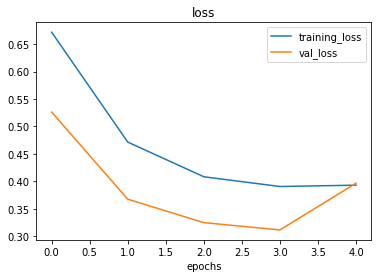

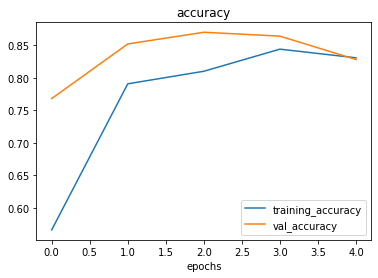

In [ ]:
plot_loss_curves(history_4)

### Data Augmentation

In [ ]:
train_datagen_1 = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True)

test_datagen_1 = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_aug = train_datagen_1.flow_from_directory(train_dir,
                                                     target_size=(224,224),
                                                     class_mode = 'binary',
                                                     batch_size=32,
                                                     shuffle=False)

train_data_aug_shuffled = train_datagen_1.flow_from_directory(train_dir,
                                                     target_size=(224,224),
                                                     class_mode = 'binary',
                                                     batch_size=32,
                                                     shuffle=True)

test_data = test_datagen_1.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_5 = Sequential([
                      Conv2D(32,3, activation='relu',input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(32,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(32,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(32,3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')

])


model_5.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])


history_5 = model_5.fit(train_data_aug,
                        epochs=10,
                        steps_per_epoch = len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/10
47/47 [==============================] - 95s 2s/step - loss: 0.7038 - accuracy: 0.4953 - val_loss: 0.6893 - val_accuracy: 0.6080
Epoch 2/10
47/47 [==============================] - 95s 2s/step - loss: 0.6919 - accuracy: 0.5560 - val_loss: 0.6786 - val_accuracy: 0.6620
Epoch 3/10
47/47 [==============================] - 93s 2s/step - loss: 0.6782 - accuracy: 0.6153 - val_loss: 0.5696 - val_accuracy: 0.7820
Epoch 4/10
47/47 [==============================] - 91s 2s/step - loss: 0.9173 - accuracy: 0.5380 - val_loss: 0.6556 - val_accuracy: 0.6040
Epoch 5/10
47/47 [==============================] - 91s 2s/step - loss: 0.6904 - accuracy: 0.5347 - val_loss: 0.6455 - val_accuracy: 0.7340
Epoch 6/10
47/47 [==============================] - 91s 2s/step - loss: 0.6422 - accuracy: 0.6840 - val_loss: 0.5653 - val_accuracy: 0.6960
Epoch 7/10
47/47 [==============================] - 91s 2s/step - loss: 0.6386 - accuracy: 0.6447 - val_loss: 0.5299 - val_accuracy: 0.7240
Epoch 8/10
47/47 [==

In [ ]:
history_6 = model_5.fit(train_data_aug_shuffled,
                        epochs=10,
                        steps_per_epoch = len(train_data_aug_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 91s 2s/step - loss: 0.5144 - accuracy: 0.7527 - val_loss: 0.3750 - val_accuracy: 0.8540
Epoch 2/10
47/47 [==============================] - 91s 2s/step - loss: 0.4851 - accuracy: 0.7847 - val_loss: 0.3524 - val_accuracy: 0.8620
Epoch 3/10
47/47 [==============================] - 91s 2s/step - loss: 0.4632 - accuracy: 0.7827 - val_loss: 0.3480 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 92s 2s/step - loss: 0.4549 - accuracy: 0.7913 - val_loss: 0.3918 - val_accuracy: 0.8240
Epoch 5/10
47/47 [==============================] - 91s 2s/step - loss: 0.4660 - accuracy: 0.7853 - val_loss: 0.3510 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 92s 2s/step - loss: 0.4296 - accuracy: 0.8080 - val_loss: 0.3625 - val_accuracy: 0.8440
Epoch 7/10
47/47 [==============================] - 90s 2s/step - loss: 0.4312 - accuracy: 0.8200 - val_loss: 0.3188 - val_accuracy: 0.8680
Epoch 8/10
47/47 [==

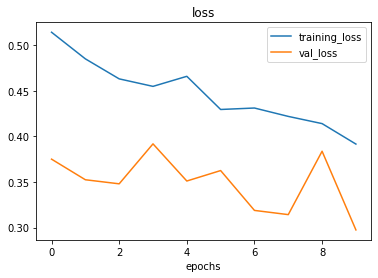

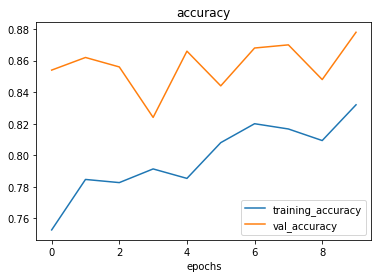

In [ ]:
plot_loss_curves(history_6)

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
steak = mpimg.imread('03-steak.jpeg')

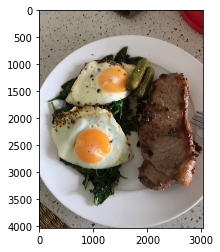

In [ ]:
plt.imshow(steak)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  #decode the image into a tensor
  img = tf.image.decode_image(img)
  #resize the image

  img = tf.image.resize(img, size=[img_shape, img_shape])

  img = img/255.

  return img

In [ ]:
steak = load_prep_image('03-steak.jpeg')

In [ ]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
pred_prob = model_5.predict(tf.expand_dims(steak, axis=0))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred_prob))]
pred_class

'steak'